# Majors vs Graduates

In [96]:
# Author: Tichina Buckle
# Date Started: 12/21/2022
# Version 2

In [2]:
#import pandas library
import pandas as pd

In [3]:
# import csv
all_df = pd.read_csv("C:\\Users\\alexa\\OneDrive\\Data Science\\Projects\\College Majors and their Graduates\\College Majors and their Graduates Dataset\\all-ages.csv")
grad_df = pd.read_csv("C:\\Users\\alexa\\OneDrive\\Data Science\\Projects\\College Majors and their Graduates\\College Majors and their Graduates Dataset\\grad-students.csv")
women_stem_df = pd.read_csv("C:\\Users\\alexa\\OneDrive\\Data Science\\Projects\\College Majors and their Graduates\\College Majors and their Graduates Dataset\\women-stem.csv")

# Data Exploration and Cleaning

In [4]:
# all_df exploration and cleaning

In [5]:
# head() || returns the first few rows of the dataframe
all_df.head()

,index,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [6]:
# makes all column names lowercase
all_df.rename(columns=str.lower, inplace=True)

In [7]:
# info() || highlights the total number of rows in the dataset, names of the columns, their data type, and any missing value
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          173 non-null    int64  
 1   major_code                     173 non-null    int64  
 2   major                          173 non-null    object 
 3   major_category                 173 non-null    object 
 4   total                          173 non-null    int64  
 5   employed                       173 non-null    int64  
 6   employed_full_time_year_round  173 non-null    int64  
 7   unemployed                     173 non-null    int64  
 8   unemployment_rate              173 non-null    float64
 9   median                         173 non-null    int64  
 10  p25th                          173 non-null    int64  
 11  p75th                          173 non-null    float64
dtypes: float64(2), int64(8), object(2)
memory usage: 1

In [8]:
# describe() || computes some summary statistics for numerical columns, like mean and median
all_df.describe()

,index,major_code,total,employed,employed_full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th
count,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,86.000000,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,50.084928,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,0.000000,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,43.000000,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,86.000000,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,129.000000,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,172.000000,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


In [9]:
# shape || computes some summary statistics for numerical columns, like mean and median
all_df.shape

(173, 12)

In [10]:
# columns & index || The columns attribute contains column names, and the index attribute contains row numbers or row names
all_df.columns

Index(['index', 'major_code', 'major', 'major_category', 'total', 'employed',
       'employed_full_time_year_round', 'unemployed', 'unemployment_rate',
       'median', 'p25th', 'p75th'],
      dtype='object')

In [11]:
all_df.index

RangeIndex(start=0, stop=173, step=1)

In [12]:
# create a copy of all_df sorted in descending order based of median salary
all_sort = all_df.sort_values('median', ascending=False)

In [13]:
# update all_sort df to only relevant columns to analysis
all_sort = all_sort[["major_code", "major", "major_category", "median", "unemployment_rate", "total"]]

In [14]:
# create new column "income_rank" by value based on position
all_sort.insert(loc=0, column='income_rank', value =list(range(1, 174)))

In [15]:
all_sort.head()

,income_rank,major_code,major,major_category,median,unemployment_rate,total
59,1,2419,PETROLEUM ENGINEERING,Engineering,125000,0.042205,19631
154,2,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,106000,0.034358,180084
57,3,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,97000,0.040309,16094
55,4,2415,METALLURGICAL ENGINEERING,Engineering,96000,0.044873,12818
58,5,2418,NUCLEAR ENGINEERING,Engineering,95000,0.067159,9826


In [16]:
# grad_df exporation and cleaning

In [17]:
grad_df.head()

,index,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [18]:
# updates all columns to be lowercase
grad_df.rename(columns=str.lower, inplace=True)

In [19]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         173 non-null    int64  
 1   major_code                    173 non-null    int64  
 2   major                         173 non-null    object 
 3   major_category                173 non-null    object 
 4   grad_total                    173 non-null    int64  
 5   grad_sample_size              173 non-null    int64  
 6   grad_employed                 173 non-null    int64  
 7   grad_full_time_year_round     173 non-null    int64  
 8   grad_unemployed               173 non-null    int64  
 9   grad_unemployment_rate        173 non-null    float64
 10  grad_median                   173 non-null    float64
 11  grad_p25                      173 non-null    int64  
 12  grad_p75                      173 non-null    float64
 13  nongr

In [20]:
grad_df.describe()

,index,major_code,grad_total,grad_sample_size,grad_employed,grad_full_time_year_round,grad_unemployed,grad_unemployment_rate,grad_median,grad_p25,...,nongrad_total,nongrad_employed,nongrad_full_time_year_round,nongrad_unemployed,nongrad_unemployment_rate,nongrad_median,nongrad_p25,nongrad_p75,grad_share,grad_premium
count,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,86.000000,3879.815029,1.276720e+05,2250.872832,94037.034682,72861.184971,3506.427746,0.039343,76755.780347,52596.508671,...,2.147203e+05,1.545535e+05,1.207368e+05,8486.323699,0.053947,58583.815029,40078.179191,84332.947977,0.400595,0.328505
std,50.084928,1687.753140,2.195512e+05,3805.923082,159723.860054,123153.615862,5909.871450,0.019076,16912.102488,10896.842595,...,3.996800e+05,2.900663e+05,2.335256e+05,16135.491564,0.019329,15028.468079,9509.017523,20861.431281,0.165964,0.185805
min,0.000000,1100.000000,1.542000e+03,22.000000,1008.000000,770.000000,0.000000,0.000000,47000.000000,24500.000000,...,2.232000e+03,1.328000e+03,9.800000e+02,0.000000,0.000000,37000.000000,25000.000000,48000.000000,0.096320,-0.025000
25%,43.000000,2403.000000,1.528400e+04,314.000000,12659.000000,9894.000000,453.000000,0.026068,65000.000000,45000.000000,...,2.056400e+04,1.591400e+04,1.175500e+04,880.000000,0.041981,48700.000000,34000.000000,72000.000000,0.267567,0.230769
50%,86.000000,3608.000000,3.787200e+04,688.000000,28930.000000,22523.000000,1179.000000,0.036654,75000.000000,50000.000000,...,6.899300e+04,5.009200e+04,3.838400e+04,3157.000000,0.051031,55000.000000,38000.000000,80000.000000,0.398745,0.320755
75%,129.000000,5503.000000,1.482550e+05,2528.000000,109944.000000,80794.000000,3329.000000,0.048051,90000.000000,60000.000000,...,1.849710e+05,1.291790e+05,1.036290e+05,7409.000000,0.064387,65000.000000,44000.000000,97000.000000,0.499117,0.400000
max,172.000000,6403.000000,1.184158e+06,21994.000000,915341.000000,703347.000000,35718.000000,0.138515,135000.000000,85000.000000,...,2.996892e+06,2.253649e+06,1.882507e+06,136978.000000,0.160907,126000.000000,80000.000000,215000.000000,0.931175,1.647059


In [21]:
grad_df.columns

Index(['index', 'major_code', 'major', 'major_category', 'grad_total',
       'grad_sample_size', 'grad_employed', 'grad_full_time_year_round',
       'grad_unemployed', 'grad_unemployment_rate', 'grad_median', 'grad_p25',
       'grad_p75', 'nongrad_total', 'nongrad_employed',
       'nongrad_full_time_year_round', 'nongrad_unemployed',
       'nongrad_unemployment_rate', 'nongrad_median', 'nongrad_p25',
       'nongrad_p75', 'grad_share', 'grad_premium'],
      dtype='object')

In [22]:
# update all_sort df to only relevant columns to analysis
grad_sort = grad_df[['major_code', 'major', 'major_category', 'grad_median', 'grad_unemployment_rate', 'grad_share']]

In [23]:
all_sort[all_sort.eq("CONSTRUCTION SERVICES").any(1)]

,income_rank,major_code,major,major_category,median,unemployment_rate,total
135,44,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,65000,0.051097,92346


In [24]:
grad_df[grad_df.eq("CONSTRUCTION SERVICES").any(1)]

,index,major_code,major,major_category,grad_total,grad_sample_size,grad_employed,grad_full_time_year_round,grad_unemployed,grad_unemployment_rate,...,nongrad_total,nongrad_employed,nongrad_full_time_year_round,nongrad_unemployed,nongrad_unemployment_rate,nongrad_median,nongrad_p25,nongrad_p75,grad_share,grad_premium
0,0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.09632,0.153846


In [25]:
grad_df.index

RangeIndex(start=0, stop=173, step=1)

In [26]:
grad_sort = grad_sort.sort_values('grad_median', ascending=False)

In [27]:
grad_sort.insert(loc=0, column='income_rank', value =list(range(1, 174)))

In [28]:
grad_sort.head()

,income_rank,major_code,major,major_category,grad_median,grad_unemployment_rate,grad_share
170,1,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,135000.0,0.021687,0.813718
52,2,2419,PETROLEUM ENGINEERING,Engineering,124000.0,0.019471,0.288075
117,3,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,111000.0,0.024824,0.467511
30,4,6202,ACTUARIAL SCIENCE,Business,110000.0,0.074244,0.236103
160,5,3609,ZOOLOGY,Biology & Life Science,110000.0,0.020928,0.667970


In [29]:
# women_stem exploration and cleaning

In [30]:
women_stem_df.head()

,index,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [31]:
all_sort[all_sort.eq("PETROLEUM ENGINEERING").any(1)]

,income_rank,major_code,major,major_category,median,unemployment_rate,total
59,1,2419,PETROLEUM ENGINEERING,Engineering,125000,0.042205,19631


In [32]:
women_stem_df[women_stem_df.eq("PETROLEUM ENGINEERING").any(1)]

,index,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000


In [33]:
women_stem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           76 non-null     int64  
 1   Rank            76 non-null     int64  
 2   Major_code      76 non-null     int64  
 3   Major           76 non-null     object 
 4   Major_category  76 non-null     object 
 5   Total           76 non-null     int64  
 6   Men             76 non-null     int64  
 7   Women           76 non-null     int64  
 8   ShareWomen      76 non-null     float64
 9   Median          76 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [34]:
women_stem_df.shape

(76, 10)

In [35]:
women_stem_df.columns

Index(['index', 'Rank', 'Major_code', 'Major', 'Major_category', 'Total',
       'Men', 'Women', 'ShareWomen', 'Median'],
      dtype='object')

In [36]:
women_stem_df.rename(columns=str.lower, inplace=True)

In [37]:
women_stem_df.head()

,index,rank,major_code,major,major_category,total,men,women,sharewomen,median
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [38]:
women_stem_df.sort_values('median', ascending=False)

,index,rank,major_code,major,major_category,total,men,women,sharewomen,median
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
...,...,...,...,...,...,...,...,...,...,...
71,71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.576360,33000
72,72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000
73,73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400
74,74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000


In [39]:
# create women_stem_sort df to extract only relevant from women_stem_df
women_stem_sort = women_stem_df[['rank', 'major_code', 'major', 'major_category','sharewomen', 'median']]
women_stem_sort.head()

,rank,major_code,major,major_category,sharewomen,median
0,1,2419,PETROLEUM ENGINEERING,Engineering,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,0.144967,65000


# Analysis

In [40]:
# compare major category to the median salary
all_sort.groupby("major_category")["unemployment_rate", "median"].mean().sort_values("median", ascending=False)

C:\Users\alexa\AppData\Local\Temp\ipykernel_19044\1559113005.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_sort.groupby("major_category")["unemployment_rate", "median"].mean().sort_values("median", ascending=False)


,unemployment_rate,median
major_category,,
Engineering,0.050630,77758.620690
Computers & Mathematics,0.059437,66272.727273
Physical Sciences,0.054541,62400.000000
Business,0.054496,60615.384615
Health,0.047209,56458.333333
Agriculture & Natural Resources,0.039569,55000.000000
Social Science,0.065686,53222.222222
Law & Public Policy,0.067854,52800.000000
Industrial Arts & Consumer Services,0.058546,52642.857143


In [41]:
# compare major category to the unemployment rate
all_sort.groupby("major_category")["unemployment_rate", "median"].mean().sort_values("unemployment_rate", ascending=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_19044\4236899756.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_sort.groupby("major_category")["unemployment_rate", "median"].mean().sort_values("unemployment_rate", ascending=True)


,unemployment_rate,median
major_category,,
Agriculture & Natural Resources,0.039569,55000.000000
Education,0.046762,43831.250000
Health,0.047209,56458.333333
Biology & Life Science,0.049936,50821.428571
Engineering,0.050630,77758.620690
Business,0.054496,60615.384615
Physical Sciences,0.054541,62400.000000
Industrial Arts & Consumer Services,0.058546,52642.857143
Computers & Mathematics,0.059437,66272.727273


In [42]:
# Library for Plotting Graphs
import matplotlib.pyplot as plt

In [43]:
all_cat = all_sort.groupby("major_category")["median"].mean()

<AxesSubplot:title={'center':'Major Category vs Median Salary'}, xlabel='major_category'>

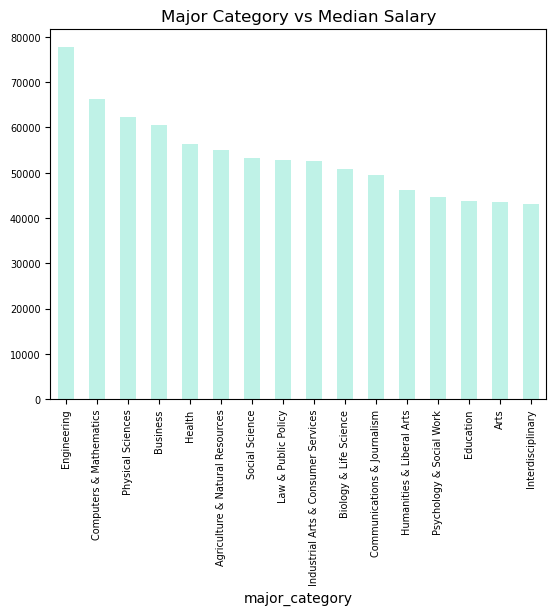

In [44]:
all_cat.sort_values(ascending=False).plot(kind='bar', color='#bff2e7', title = 'Major Category vs Median Salary', fontsize=7)

In [45]:
all_unemployment = all_sort.groupby("major_category")["unemployment_rate"].mean()

In [93]:
all_unemployment

major_category
Agriculture & Natural Resources        0.039569
Arts                                   0.087601
Biology & Life Science                 0.049936
Business                               0.054496
Communications & Journalism            0.069125
Computers & Mathematics                0.059437
Education                              0.046762
Engineering                            0.050630
Health                                 0.047209
Humanities & Liberal Arts              0.069429
Industrial Arts & Consumer Services    0.058546
Interdisciplinary                      0.077269
Law & Public Policy                    0.067854
Physical Sciences                      0.054541
Psychology & Social Work               0.077867
Social Science                         0.065686
Name: unemployment_rate, dtype: float64

<AxesSubplot:title={'center':'Major Category vs Unemployment Rate'}, xlabel='major_category'>

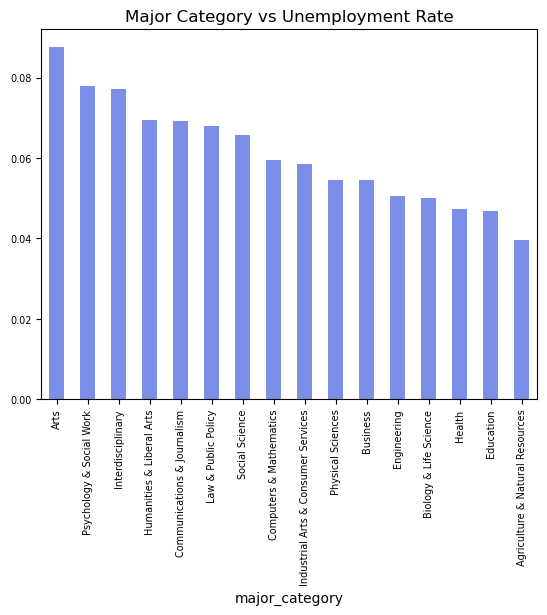

In [46]:
all_unemployment.sort_values(ascending=False).plot(kind='bar', color='#7b8fe8', title = 'Major Category vs Unemployment Rate', fontsize=7)

In [47]:
# ten highest paying undergraduate majors
all_sort[['major', 'major_category', 'median']].sort_values('median', ascending=False).head(10)

,major,major_category,median
59,PETROLEUM ENGINEERING,Engineering,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,97000
55,METALLURGICAL ENGINEERING,Engineering,96000
58,NUCLEAR ENGINEERING,Engineering,95000
56,MINING AND MINERAL ENGINEERING,Engineering,92000
97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,92000
48,ELECTRICAL ENGINEERING,Engineering,88000
45,CHEMICAL ENGINEERING,Engineering,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,85000


In [48]:
# ten lowest paying undergraduate majors
all_sort[['major', 'major_category', 'median']].sort_values('median', ascending=True).head(10)

,major,major_category,median
88,NEUROSCIENCE,Biology & Life Science,35000
31,EARLY CHILDHOOD EDUCATION,Education,35300
145,STUDIO ARTS,Arts,37600
124,HUMAN SERVICES AND COMMUNITY ORGANIZATION,Psychology & Social Work,38000
117,COUNSELING PSYCHOLOGY,Psychology & Social Work,39000
102,THEOLOGY AND RELIGIOUS VOCATIONS,Humanities & Liberal Arts,40000
141,VISUAL AND PERFORMING ARTS,Arts,40000
28,ELEMENTARY EDUCATION,Education,40000
77,LIBRARY SCIENCE,Education,40000
24,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,40000


In [49]:
# ten highest paying graduate majors
grad_sort[['major', 'major_category', 'grad_median']].sort_values('grad_median', ascending=False).head(10)

,major,major_category,grad_median
170,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,135000.0
52,PETROLEUM ENGINEERING,Engineering,124000.0
117,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,111000.0
30,ACTUARIAL SCIENCE,Business,110000.0
160,ZOOLOGY,Biology & Life Science,110000.0
144,NUCLEAR ENGINEERING,Engineering,110000.0
59,ENGINEERING AND INDUSTRIAL MANAGEMENT,Engineering,107000.0
124,AEROSPACE ENGINEERING,Engineering,107000.0
98,ELECTRICAL ENGINEERING,Engineering,106000.0
86,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,105000.0


In [50]:
# ten lowest paying graduate majors
grad_sort[['major', 'major_category', 'grad_median']].sort_values('grad_median', ascending=True).head(10)

,major,major_category,grad_median
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,47000.0
99,THEOLOGY AND RELIGIOUS VOCATIONS,Humanities & Liberal Arts,48000.0
168,COUNSELING PSYCHOLOGY,Psychology & Social Work,50000.0
76,EARLY CHILDHOOD EDUCATION,Education,50000.0
45,HUMAN SERVICES AND COMMUNITY ORGANIZATION,Psychology & Social Work,50100.0
48,STUDIO ARTS,Arts,50750.0
157,LIBRARY SCIENCE,Education,52000.0
113,SOCIAL WORK,Psychology & Social Work,53000.0
46,VISUAL AND PERFORMING ARTS,Arts,53000.0
81,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,54000.0


In [51]:
# create new dataframe representing graduate major categories and their median salaries
grad_cat = grad_sort.groupby("major_category")["grad_median"].mean()
grad_cat

major_category
Agriculture & Natural Resources        69130.000000
Arts                                   56543.750000
Biology & Life Science                 83000.000000
Business                               84153.846154
Communications & Journalism            63000.000000
Computers & Mathematics                85545.454545
Education                              58437.500000
Engineering                            94327.586207
Health                                 80291.666667
Humanities & Liberal Arts              67333.333333
Industrial Arts & Consumer Services    66571.428571
Interdisciplinary                      55000.000000
Law & Public Policy                    76600.000000
Physical Sciences                      88800.000000
Psychology & Social Work               62455.555556
Social Science                         76444.444444
Name: grad_median, dtype: float64

<AxesSubplot:title={'center':'Major Category VS Median Salary at Graduate Level'}, xlabel='major_category'>

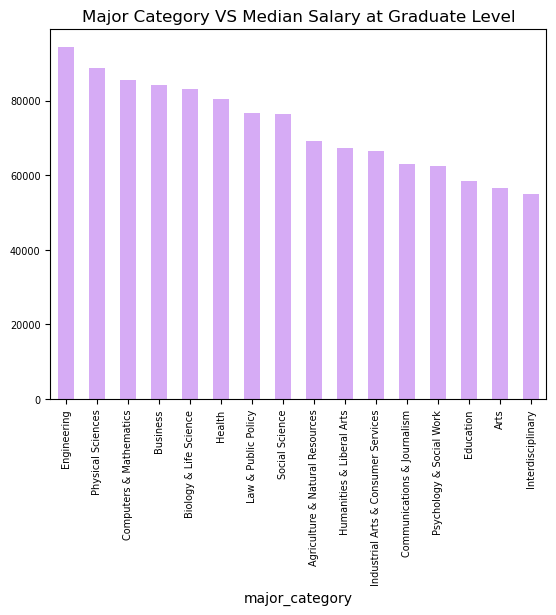

In [52]:
grad_cat.sort_values(ascending=False).plot(kind='bar', color='#d6abf5', title = 'Major Category VS Median Salary at Graduate Level', fontsize=7)

In [53]:
# create new dataframe representing graduate major categories and their unemployment rate
grad_uer = grad_sort.groupby("major_category")["grad_unemployment_rate"].mean()
grad_uer

major_category
Agriculture & Natural Resources        0.033260
Arts                                   0.056452
Biology & Life Science                 0.027510
Business                               0.050391
Communications & Journalism            0.043221
Computers & Mathematics                0.051089
Education                              0.027043
Engineering                            0.039317
Health                                 0.025487
Humanities & Liberal Arts              0.044186
Industrial Arts & Consumer Services    0.067228
Interdisciplinary                      0.020125
Law & Public Policy                    0.034000
Physical Sciences                      0.025417
Psychology & Social Work               0.042032
Social Science                         0.045818
Name: grad_unemployment_rate, dtype: float64

<AxesSubplot:title={'center':'Major Category VS Umemployment Rate at Graduate Level'}, xlabel='major_category'>

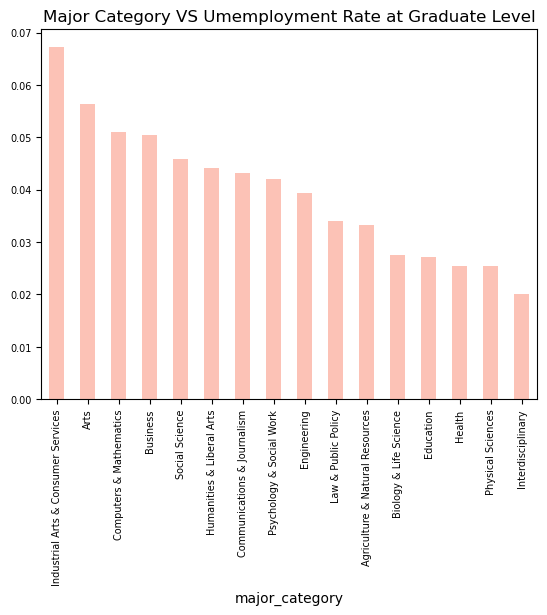

In [54]:
grad_uer.sort_values(ascending=False).plot(kind='bar', color='#fcc2b6', title = 'Major Category VS Umemployment Rate at Graduate Level', fontsize=7)

In [55]:
# different in median salary between undergraduate and graduate level
all_grad_merge = pd.merge(grad_sort, all_sort, on='major')
all_grad_merge.head()

,income_rank_x,major_code_x,major,major_category_x,grad_median,grad_unemployment_rate,grad_share,income_rank_y,major_code_y,major_category_y,median,unemployment_rate,total
0,1,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,135000.0,0.021687,0.813718,99,6106,Health,50000,0.070010,32514
1,2,2419,PETROLEUM ENGINEERING,Engineering,124000.0,0.019471,0.288075,1,2419,Engineering,125000,0.042205,19631
2,3,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,111000.0,0.024824,0.467511,2,6108,Health,106000,0.034358,180084
3,4,6202,ACTUARIAL SCIENCE,Business,110000.0,0.074244,0.236103,24,6202,Business,72000,0.056064,9763
4,5,3609,ZOOLOGY,Biology & Life Science,110000.0,0.020928,0.667970,80,3609,Biology & Life Science,55000,0.048363,55395


In [56]:
all_grad_merge = all_grad_merge.assign(difference=all_grad_merge['grad_median']-all_grad_merge['median'])
all_grad_merge.head()

,income_rank_x,major_code_x,major,major_category_x,grad_median,grad_unemployment_rate,grad_share,income_rank_y,major_code_y,major_category_y,median,unemployment_rate,total,difference
0,1,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,135000.0,0.021687,0.813718,99,6106,Health,50000,0.070010,32514,85000.0
1,2,2419,PETROLEUM ENGINEERING,Engineering,124000.0,0.019471,0.288075,1,2419,Engineering,125000,0.042205,19631,-1000.0
2,3,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,111000.0,0.024824,0.467511,2,6108,Health,106000,0.034358,180084,5000.0
3,4,6202,ACTUARIAL SCIENCE,Business,110000.0,0.074244,0.236103,24,6202,Business,72000,0.056064,9763,38000.0
4,5,3609,ZOOLOGY,Biology & Life Science,110000.0,0.020928,0.667970,80,3609,Biology & Life Science,55000,0.048363,55395,55000.0


In [57]:
# biggest jumps from undergraduate to graduate level
all_grad_merge[['major', 'major_category_x', 'grad_median', 'median', 'difference']].sort_values('difference', ascending=False).head(20)

,major,major_category_x,grad_median,median,difference
0,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,135000.0,50000,85000.0
4,ZOOLOGY,Biology & Life Science,110000.0,55000,55000.0
10,PHARMACOLOGY,Biology & Life Science,105000.0,60000,45000.0
29,BIOLOGY,Biology & Life Science,95000.0,51000,44000.0
26,BIOCHEMICAL SCIENCES,Biology & Life Science,96000.0,53000,43000.0
28,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,Biology & Life Science,95000.0,53000,42000.0
17,CHEMISTRY,Physical Sciences,100000.0,59000,41000.0
50,MOLECULAR BIOLOGY,Biology & Life Science,85000.0,45000,40000.0
43,PHYSIOLOGY,Biology & Life Science,90000.0,50000,40000.0
3,ACTUARIAL SCIENCE,Business,110000.0,72000,38000.0


In [58]:
# smallest jumps from undergraduate to graduate level
all_grad_merge[['major', 'major_category_x', 'grad_median', 'median', 'difference']].sort_values('difference', ascending=True).head(20)

,major,major_category_x,grad_median,median,difference
1,PETROLEUM ENGINEERING,Engineering,124000.0,125000,-1000.0
76,ARCHITECTURAL ENGINEERING,Engineering,78000.0,78000,0.0
163,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,54000.0,52000,2000.0
120,SOIL SCIENCE,Agriculture & Natural Resources,65000.0,63000,2000.0
20,METALLURGICAL ENGINEERING,Engineering,100000.0,96000,4000.0
2,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,111000.0,106000,5000.0
12,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,102000.0,97000,5000.0
23,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,98000.0,92000,6000.0
172,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,47000.0,40000,7000.0
117,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,65000.0,58000,7000.0


In [59]:
# category of major with biggest jumps
cat_merge = pd.merge(grad_cat, all_cat, on='major_category')
cat_merge.head()

,grad_median,median
major_category,,
Agriculture & Natural Resources,69130.000000,55000.000000
Arts,56543.750000,43525.000000
Biology & Life Science,83000.000000,50821.428571
Business,84153.846154,60615.384615
Communications & Journalism,63000.000000,49500.000000


In [60]:
cat_merge = cat_merge.assign(difference=cat_merge['grad_median']-cat_merge['median'])
cat_merge

,grad_median,median,difference
major_category,,,
Agriculture & Natural Resources,69130.000000,55000.000000,14130.000000
Arts,56543.750000,43525.000000,13018.750000
Biology & Life Science,83000.000000,50821.428571,32178.571429
Business,84153.846154,60615.384615,23538.461538
Communications & Journalism,63000.000000,49500.000000,13500.000000
Computers & Mathematics,85545.454545,66272.727273,19272.727273
Education,58437.500000,43831.250000,14606.250000
Engineering,94327.586207,77758.620690,16568.965517
Health,80291.666667,56458.333333,23833.333333


In [61]:
# find average grad_median, median and difference
cat_merge.describe()

,grad_median,median,difference
count,16.000000,16.000000,16.000000
mean,72977.160342,53655.211213,19321.949130
std,12303.824126,9503.857683,5817.449201
min,55000.000000,43000.000000,12000.000000
25%,62863.888889,45698.888889,14079.642857
50%,72787.222222,52721.428571,18586.363636
75%,83288.461538,57497.596154,23603.846154
max,94327.586207,77758.620690,32178.571429


<AxesSubplot:title={'center':'Major Category and Median'}, xlabel='major_category'>

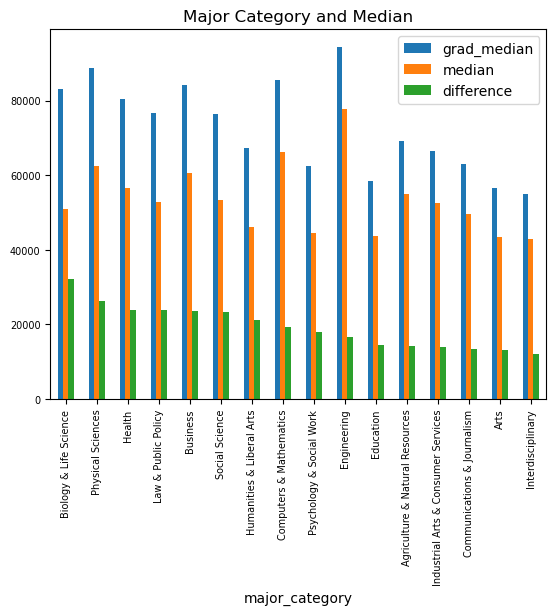

In [62]:
cat_merge.sort_values('difference', ascending=False).plot(kind='bar', title = 'Major Category and Median', fontsize=7)

In [63]:
# how women in stem compare to the all
women_stem_sort.head()

,rank,major_code,major,major_category,sharewomen,median
0,1,2419,PETROLEUM ENGINEERING,Engineering,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,0.144967,65000


In [64]:
# majors with the highest paying women
women_stem_sort.sort_values('median', ascending=False).head(15)

,rank,major_code,major,major_category,sharewomen,median
0,1,2419,PETROLEUM ENGINEERING,Engineering,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,0.144967,65000
5,6,2405,CHEMICAL ENGINEERING,Engineering,0.341631,65000
6,7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,0.535714,62000
9,10,2408,ELECTRICAL ENGINEERING,Engineering,0.196450,60000
12,13,2404,BIOMEDICAL ENGINEERING,Engineering,0.437847,60000
11,12,5008,MATERIALS SCIENCE,Engineering,0.310820,60000


In [65]:
# majors with the lowest paying women
women_stem_sort.sort_values('median', ascending=True).head(15)

,rank,major_code,major,major_category,sharewomen,median
75,76,3609,ZOOLOGY,Biology & Life Science,0.637293,26000
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,0.967998,28000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,0.774577,32400
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,0.721866,33000
71,72,3604,ECOLOGY,Biology & Life Science,0.576360,33000
70,71,3600,BIOLOGY,Biology & Life Science,0.601858,33400
69,70,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,0.566641,33500
68,69,3699,MISCELLANEOUS BIOLOGY,Biology & Life Science,0.556604,33500
67,68,6110,COMMUNITY AND PUBLIC HEALTH,Health,0.792095,34000
66,67,4002,NUTRITION SCIENCES,Health,0.864456,35000


In [66]:
# major with the highest share of women
women_stem_sort.sort_values('sharewomen', ascending=False).head(15)

,rank,major_code,major,major_category,sharewomen,median
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,0.967998,28000
40,41,6104,MEDICAL ASSISTING SERVICES,Health,0.927807,42000
26,27,6107,NURSING,Health,0.896019,48000
58,59,6199,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,Health,0.881294,36000
66,67,4002,NUTRITION SCIENCES,Health,0.864456,35000
67,68,6110,COMMUNITY AND PUBLIC HEALTH,Health,0.792095,34000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,0.774577,32400
65,66,6103,HEALTH AND MEDICAL ADMINISTRATIVE SERVICES,Health,0.764427,35000
36,37,6105,MEDICAL TECHNOLOGIES TECHNICIANS,Health,0.753927,45000
28,29,5102,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...",Physical Sciences,0.750473,46000


In [67]:
# major with the lowest share of women
women_stem_sort.sort_values('sharewomen', ascending=True).head(15)

,rank,major_code,major,major_category,sharewomen,median
43,44,2504,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,Engineering,0.077453,40000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,0.101852,75000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.107313,70000
7,8,2414,MECHANICAL ENGINEERING,Engineering,0.119559,60000
0,1,2419,PETROLEUM ENGINEERING,Engineering,0.120564,110000
8,9,2401,AEROSPACE ENGINEERING,Engineering,0.139793,60000
4,5,2418,NUCLEAR ENGINEERING,Engineering,0.144967,65000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,0.153037,73000
38,39,2501,ENGINEERING AND INDUSTRIAL MANAGEMENT,Engineering,0.174123,44000
39,40,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,0.178982,42000


In [68]:
# major_category with the highest share of women
women_cat_share = women_stem_sort.groupby('major_category')["sharewomen"].mean()
women_cat_share

major_category
Biology & Life Science     0.587193
Computers & Mathematics    0.311772
Engineering                0.238889
Health                     0.795152
Physical Sciences          0.508683
Name: sharewomen, dtype: float64

<AxesSubplot:title={'center':'Major Category VS Women Share'}, xlabel='major_category'>

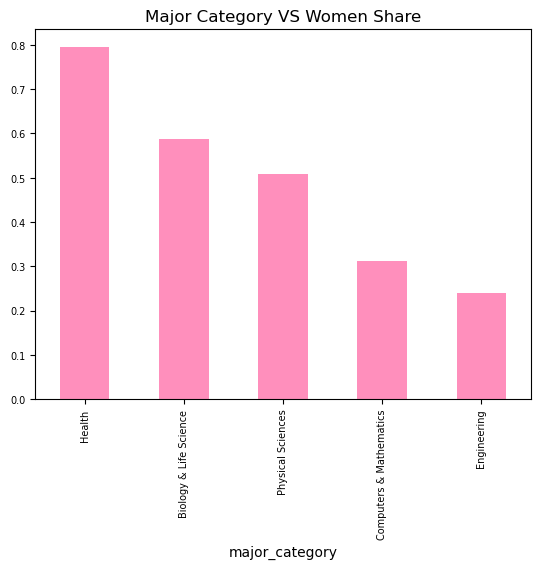

In [69]:
women_cat_share.sort_values(ascending=False).plot(kind='bar', color='#ff8fbc', title = 'Major Category VS Women Share', fontsize=7)

In [70]:
# median of major_category for women
women_cat_med = women_stem_sort.groupby('major_category')["median"].mean()
women_cat_med

major_category
Biology & Life Science     36421.428571
Computers & Mathematics    42745.454545
Engineering                57382.758621
Health                     36825.000000
Physical Sciences          41890.000000
Name: median, dtype: float64

In [71]:
women_vs_all_cat = pd.merge(women_cat_med, all_cat, on='major_category')
women_vs_all_cat

,median_x,median_y
major_category,,
Biology & Life Science,36421.428571,50821.428571
Computers & Mathematics,42745.454545,66272.727273
Engineering,57382.758621,77758.620690
Health,36825.000000,56458.333333
Physical Sciences,41890.000000,62400.000000


In [72]:
# rename categories for readibility
women_vs_all_cat = women_vs_all_cat.rename(columns={'median_x': 'women_median', 'median_y': 'median'})
women_vs_all_cat

,women_median,median
major_category,,
Biology & Life Science,36421.428571,50821.428571
Computers & Mathematics,42745.454545,66272.727273
Engineering,57382.758621,77758.620690
Health,36825.000000,56458.333333
Physical Sciences,41890.000000,62400.000000


<AxesSubplot:title={'center':'Median Salary of Women in STEM VS ALL'}, xlabel='major_category'>

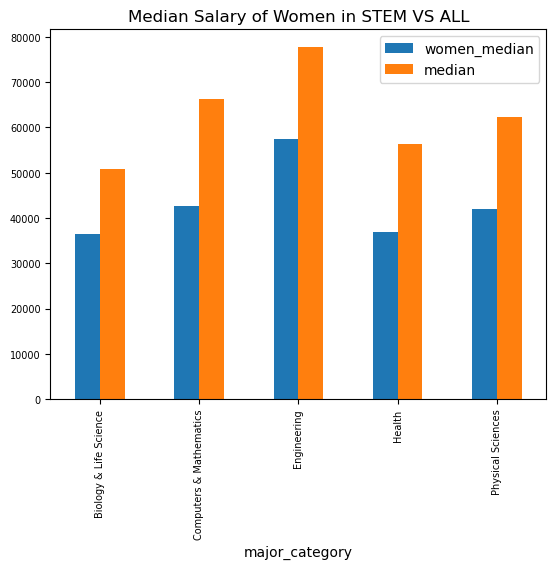

In [73]:
women_vs_all_cat.plot(kind='bar', title = 'Median Salary of Women in STEM VS ALL', fontsize=7)

In [74]:
# different in median between all and the women by categories
women_vs_all_cat = women_vs_all_cat.assign(difference=women_vs_all_cat['median']-women_vs_all_cat['women_median'])

<AxesSubplot:title={'center':'Major Category and Median Differences'}, xlabel='major_category'>

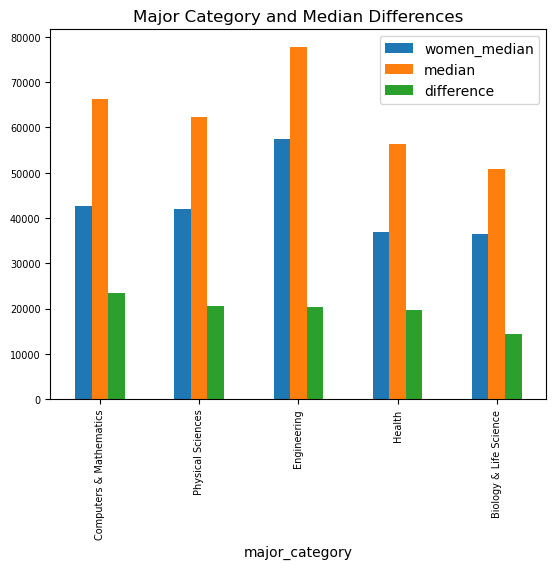

In [75]:
women_vs_all_cat.sort_values('difference', ascending=False).plot(kind='bar', title = 'Major Category and Median Differences', fontsize=7)

In [76]:
# different in median between all and the women1`
women_vs_all_cat.describe()

,women_median,median,difference
count,5.000000,5.000000,5.000000
mean,43052.928348,62742.221973,19689.293626
std,8508.155777,10242.880280,3311.146983
min,36421.428571,50821.428571,14400.000000
25%,36825.000000,56458.333333,19633.333333
50%,41890.000000,62400.000000,20375.862069
75%,42745.454545,66272.727273,20510.000000
max,57382.758621,77758.620690,23527.272727


In [77]:
# majors with the smallest diference
women_vs_all = pd.merge(women_stem_sort, all_sort, on='major')
women_vs_all

,rank,major_code_x,major,major_category_x,sharewomen,median_x,income_rank,major_code_y,major_category_y,median_y,unemployment_rate,total
0,1,2419,PETROLEUM ENGINEERING,Engineering,0.120564,110000,1,2419,Engineering,125000,0.042205,19631
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,0.101852,75000,6,2416,Engineering,92000,0.047032,10746
2,3,2415,METALLURGICAL ENGINEERING,Engineering,0.153037,73000,4,2415,Engineering,96000,0.044873,12818
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.107313,70000,3,2417,Engineering,97000,0.040309,16094
4,5,2418,NUCLEAR ENGINEERING,Engineering,0.144967,65000,5,2418,Engineering,95000,0.067159,9826
...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,3604,ECOLOGY,Biology & Life Science,0.576360,33000,123,3604,Biology & Life Science,47500,0.048917,45368
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,0.721866,33000,56,6109,Health,61000,0.026292,252138
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,0.774577,32400,95,6100,Health,50000,0.054701,104516
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,0.967998,28000,157,6102,Health,42000,0.046467,74977


In [78]:
women_vs_all_sort = women_vs_all[['major', 'rank', 'income_rank', 'major_category_x', 'median_x', 'median_y', 'sharewomen']]
women_vs_all_sort

,major,rank,income_rank,major_category_x,median_x,median_y,sharewomen
0,PETROLEUM ENGINEERING,1,1,Engineering,110000,125000,0.120564
1,MINING AND MINERAL ENGINEERING,2,6,Engineering,75000,92000,0.101852
2,METALLURGICAL ENGINEERING,3,4,Engineering,73000,96000,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,3,Engineering,70000,97000,0.107313
4,NUCLEAR ENGINEERING,5,5,Engineering,65000,95000,0.144967
...,...,...,...,...,...,...,...
71,ECOLOGY,72,123,Biology & Life Science,33000,47500,0.576360
72,TREATMENT THERAPY PROFESSIONS,73,56,Health,33000,61000,0.721866
73,GENERAL MEDICAL AND HEALTH SERVICES,74,95,Health,32400,50000,0.774577
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,75,157,Health,28000,42000,0.967998


In [79]:
# rename columns for readability
women_vs_all_sort = women_vs_all_sort.rename(columns={'rank': 'women_rank', 'median_x': 'women_median', 'median_y': 'median', 'major_category_x': 'major_category'})
women_vs_all_sort

,major,women_rank,income_rank,major_category,women_median,median,sharewomen
0,PETROLEUM ENGINEERING,1,1,Engineering,110000,125000,0.120564
1,MINING AND MINERAL ENGINEERING,2,6,Engineering,75000,92000,0.101852
2,METALLURGICAL ENGINEERING,3,4,Engineering,73000,96000,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,3,Engineering,70000,97000,0.107313
4,NUCLEAR ENGINEERING,5,5,Engineering,65000,95000,0.144967
...,...,...,...,...,...,...,...
71,ECOLOGY,72,123,Biology & Life Science,33000,47500,0.576360
72,TREATMENT THERAPY PROFESSIONS,73,56,Health,33000,61000,0.721866
73,GENERAL MEDICAL AND HEALTH SERVICES,74,95,Health,32400,50000,0.774577
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,75,157,Health,28000,42000,0.967998


In [80]:
# add column to difference between women_median and median
women_vs_all_sort = women_vs_all_sort.assign(difference=women_vs_all_sort['median']-women_vs_all_sort['women_median'])
women_vs_all_sort

,major,women_rank,income_rank,major_category,women_median,median,sharewomen,difference
0,PETROLEUM ENGINEERING,1,1,Engineering,110000,125000,0.120564,15000
1,MINING AND MINERAL ENGINEERING,2,6,Engineering,75000,92000,0.101852,17000
2,METALLURGICAL ENGINEERING,3,4,Engineering,73000,96000,0.153037,23000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,4,3,Engineering,70000,97000,0.107313,27000
4,NUCLEAR ENGINEERING,5,5,Engineering,65000,95000,0.144967,30000
...,...,...,...,...,...,...,...,...
71,ECOLOGY,72,123,Biology & Life Science,33000,47500,0.576360,14500
72,TREATMENT THERAPY PROFESSIONS,73,56,Health,33000,61000,0.721866,28000
73,GENERAL MEDICAL AND HEALTH SERVICES,74,95,Health,32400,50000,0.774577,17600
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,75,157,Health,28000,42000,0.967998,14000


In [81]:
# majors with the biggest major between women_median and median
women_vs_all_sort.sort_values('difference', ascending=False).head(20)

,major,women_rank,income_rank,major_category,women_median,median,sharewomen,difference
49,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,50,2,Health,40000,106000,0.630716,66000
39,MATHEMATICS AND COMPUTER SCIENCE,40,7,Computers & Mathematics,42000,92000,0.178982,50000
24,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,25,10,Engineering,50000,85000,0.322222,35000
38,ENGINEERING AND INDUSTRIAL MANAGEMENT,39,22,Engineering,44000,74000,0.174123,30000
4,NUCLEAR ENGINEERING,5,5,Engineering,65000,95000,0.144967,30000
75,ZOOLOGY,76,80,Biology & Life Science,26000,55000,0.637293,29000
56,GEOLOGY AND EARTH SCIENCE,57,43,Physical Sciences,36200,65000,0.470197,28800
22,CIVIL ENGINEERING,23,17,Engineering,50000,78000,0.227118,28000
9,ELECTRICAL ENGINEERING,10,8,Engineering,60000,88000,0.196450,28000
72,TREATMENT THERAPY PROFESSIONS,73,56,Health,33000,61000,0.721866,28000


In [82]:
# majors with the smallest major between women_median and median
women_vs_all_sort.sort_values('difference', ascending=True).head(20)

,major,women_rank,income_rank,major_category,women_median,median,sharewomen,difference
64,NEUROSCIENCE,65,173,Biology & Life Science,35000,35000,0.638147,0
14,BIOLOGICAL ENGINEERING,15,53,Engineering,57100,62000,0.320784,4900
48,MOLECULAR BIOLOGY,49,144,Biology & Life Science,40000,45000,0.594208,5000
12,BIOMEDICAL ENGINEERING,13,40,Engineering,60000,65000,0.437847,5000
13,ENGINEERING MECHANICS PHYSICS AND SCIENCE,14,39,Engineering,58000,65000,0.183985,7000
47,GENETICS,48,117,Biology & Life Science,40000,48000,0.515543,8000
58,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,59,137,Health,36000,45000,0.881294,9000
37,OCEANOGRAPHY,38,76,Physical Sciences,44700,55000,0.688999,10300
42,COGNITIVE SCIENCE AND BIOPSYCHOLOGY,43,87,Biology & Life Science,41000,53000,0.564866,12000
54,BOTANY,55,108,Biology & Life Science,37000,50000,0.528969,13000


In [95]:
# major where women out earning men
women_vs_all_sort[pd.to_numeric(women_vs_all_sort['women_median']) > pd.to_numeric(women_vs_all_sort['median'])]

,major,women_rank,income_rank,major_category,women_median,median,sharewomen,difference


# Conclusions / Summary

### Conclusions about the All (All Graduate Who have done a Major)

* Enginnering Majors are by far the most lucrative category of degree, enjoying an median annual salary of $78k and an average umemployment of 0.05.
<br>
* Art and Interdiscipinary make up the least lucrative major, with an art major expecting a median salary of 43k and and an average umemployment of 0.087 and an interdiscipinary also expecting median salary of 43k and an average umemployment of 0.077.
<br>
* Unsurprising most of the 8/10 best paying majors where Engineering major, with the highest paying major being PETROLEUM ENGINEERING with an median salary of 125k
<br>
* Though Art and Interdiscipinary are the major with the lowest median salary of average, only 2/10 of the lowest being degrees where art degrees, and many of the others being Psychology & Social Work and Education majors
<br>
* The overall lowest earning major was Neuroscience with a median salary of 35k per year.

### Conclusions about the Graduate Level Majors

* Enginnering still made up most of the highest earning degrees, however dropping from 8/10 to 6/10.
<br>
* HEALTH AND MEDICAL PREPARATORY PROGRAMS were the overall highest earning majors at the graduate level, with the median salary of 135k
<br>
* COSMETOLOGY SERVICES AND CULINARY ARTS was the overall lowest earning majors at the graduate level, with the median salary of 47k
<br>
* Enginnering majors reminded the category of degrees with the highest earning graduates even at the graduate level, with the median salary jumping 94k, and the gap the top majors closing.
    * Second Place being Physical Sciences with median salaries of 89k.
    * Third Place being Computers & Mathematics  with median salaries of 85k.
<br>
* The earning majors at the graduate level were Interdisciplinary, Arts, and Education. Interdisciplinary earning a median salary of 55k, Arts majors earning 57k and Education earning 58k. However Interdisciplinary and Education major experience low unemployment rate, Interdisciplinary having the lowest umeployment rate of 0.02 and Education an unemployment rate of 0.027
<br>
* The category of major with the biggest jump from all to graduate level was Biology & Life Science with a 32k increase and the category with the lowest jump was Interdisciplinary was an increase of 12k.

### Conclusions about Women with STEM Majors

* The highest earning major for women mostly remained the same as the general population.
<br>
* The category with the large of share women was Health at 80%, while Enginnering had by far the lowest at 24% women.
<br>
* Women in STEM on average have a median salary of  20k less than the general polution

## Other Information

### Contact Me

* [LinkedIn](https://www.linkedin.com/in/tichinabuckle/)
* [Github](https://github.com/TichinaBuckle)
* [Kaggle](https://www.kaggle.com/tichinabuckle)

### Dataset

[College Majors and their Graduates](https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their)
<br>
[By: The Devastator](https://www.kaggle.com/thedevastator)